In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
table = pd.read_html('file:///C://Users//USER//Downloads//K_Chart.html')
table[0]
data = pd.DataFrame(table[0])
data.columns = data.columns.droplevel(1)# remove MultiIndex 
data = data.drop(['交易 日數','總成交 (億元)', '日成交 均量', '法人買賣超 (億元)', '法人買賣超 (億元)', '法人買賣超 (億元)',
       '法人買賣超 (億元)', '融資 (億元)', '融資 (億元)', '融券 (萬張)', '融券 (萬張)'], axis=1)

animal = {4: '鼠', 5: '牛', 6: '虎', 7: '兔', 8: '龍', 9: '蛇', 10: '馬', 11: '羊', 
          0: '猴', 1: '雞', 2: '狗', 3: '豬'}


year = {0:'第三年', 1:'第二年', 2:'第一年'}

# 新增欄位
data['生肖'] = data.loc[:,'交易 年度'] % 12
data['year'] = 0
 
data['生肖漲機率%'] = 0
data['生肖跌機率%'] = 0
data['漲跌文字'] = 0
data['小跌'] = 0
data['大跌'] = 0
data['小漲'] = 0
data['大漲'] = 0

# add 生肖 
for i,j in enumerate(data['生肖'])  :
    data.loc[i,'生肖'] = animal[j]

# add 生肖 第一年 第二年 第三年
for i in range(data.shape[0]):
    if data.loc[i,'交易 年度'] in range(2011,2023):
        data.loc[i,'year'] = '第三年'
    elif data.loc[i,'交易 年度'] in range(1999,2011):
         data.loc[i,'year'] = '第二年'
    else:
         data.loc[i,'year'] = '第一年'
            
# 判斷當年漲跌 
for i in range(data.shape[0]):
    if data.loc[i,'漲跌 (%)'] < 0 :
        # 大於跌平均 = 大跌
        if data.loc[i,'漲跌 (%)'] <  data.loc[data['漲跌 (%)'] < 0,'漲跌 (%)'].mean():
             data.loc[i,'漲跌文字'] = '大跌' 
        # 小於跌平均 = 小跌
        else :
            data.loc[i,'漲跌文字'] = '小跌'           
    else : 
        # 大於漲平均 = 大漲 
        if data.loc[i,'漲跌 (%)'] > data.loc[data['漲跌 (%)'] > 0,'漲跌 (%)'].mean():
            data.loc[i,'漲跌文字'] = '大漲' 
        # 小於漲平均 = 小漲 
        else :
            data.loc[i,'漲跌文字'] = '小漲'

            
# 漲跌機率            
# 新增兩個字典 
dict_up, dict_down = {}, {}
for i in range(1,data.shape[0]):
    # 漲跌 (%) > 0 dict_up 加 1 ， 並且在 dict_down 設定初始值 0
    if data.loc[i,'漲跌 (%)'] > 0 :
        dict_up[data.loc[i,'生肖']] = dict_up.get(data.loc[i,'生肖'],0) + 1
        dict_down[data.loc[i,'生肖']] = dict_down.get(data.loc[i,'生肖'],0)
    # 漲跌 (%) < 0 dict_up 加 1
    else :
        dict_down[data.loc[i,'生肖']] = dict_down.get(data.loc[i,'生肖'],0) + 1
        
# 計算各生肖漲機率百分比
for i in range(1,data.shape[0]):    
    data.loc[i,'生肖漲機率%'] = round(dict_up[data.loc[i,'生肖']] / 3 * 100)
    data.loc[i,'生肖跌機率%'] = round(dict_down[data.loc[i,'生肖']] / 3 * 100)

# 計算各生肖 大跌、小跌、小漲、大跌次數
# pandas.get_dummies()
for i in range(1,data.shape[0]):
    if data.loc[i,'漲跌文字'] == '大漲':
        data.loc[i,'大漲'] += 1
    elif data.loc[i,'漲跌文字'] == '小漲':
        data.loc[i,'小漲'] += 1
    elif data.loc[i,'漲跌文字'] == '大跌':
        data.loc[i,'大跌'] += 1
    else : data.loc[i,'小跌'] += 1
        
# drop 2023
data = data.drop(0)
data

,交易 年度,開盤,最高,最低,收盤,漲跌,漲跌 (%),振幅 (%),生肖,year,生肖漲機率%,生肖跌機率%,漲跌文字,小跌,大跌,小漲,大漲
1,2022,18260.23,18619.61,12629.48,14137.69,-4081.15,-22.40,32.9,虎,第三年,33,67,小跌,1,0,0,0
2,2021,14720.25,18291.25,14720.25,18218.84,3486.31,23.70,24.2,牛,第三年,100,0,小漲,0,0,1,0
3,2020,12026.50,14760.06,8523.63,14732.53,2735.39,22.80,52.0,鼠,第三年,67,33,小漲,0,0,1,0
4,2019,9725.27,12125.90,9319.28,11997.14,2269.73,23.30,28.9,豬,第三年,67,33,小漲,0,0,1,0
5,2018,10664.82,11270.18,9400.69,9727.41,-915.45,-8.60,17.6,狗,第三年,67,33,小跌,1,0,0,0
6,2017,9252.56,10882.65,9235.95,10642.86,1389.36,15.00,17.8,雞,第三年,100,0,小漲,0,0,1,0
7,2016,8315.79,9430.34,7627.89,9253.50,915.44,11.00,21.6,猴,第三年,67,33,小漲,0,0,1,0
8,2015,9292.31,10014.28,7203.07,8338.06,-969.20,-10.40,30.2,羊,第三年,67,33,小跌,1,0,0,0
9,2014,8618.60,9593.68,8230.46,9307.26,695.75,8.08,15.8,馬,第三年,33,67,小漲,0,0,1,0
10,2013,7738.05,8647.24,7603.27,8611.51,912.01,11.80,13.6,蛇,第三年,100,0,小漲,0,0,1,0


In [8]:
littledown, down, up, bigup   = {}, {}, {}, {}

# 計算大跌、小跌、小漲、大漲次數
for i in range(1,data.shape[0]+1):
    if data.loc[i,'小跌'] == 1 :
        littledown[data.loc[i,'生肖']] = littledown.get(data.loc[i,'生肖'],0) + 1 
    elif data.loc[i,'大跌'] == 1 :
        down[data.loc[i,'生肖']] = down.get(data.loc[i,'生肖'],0) + 1 
    elif data.loc[i,'小漲'] == 1 :
        up[data.loc[i,'生肖']] = up.get(data.loc[i,'生肖'],0) + 1
    elif data.loc[i,'大漲'] == 1 :
        bigup[data.loc[i,'生肖']] = bigup.get(data.loc[i,'生肖'],0) + 1
    # 沒有填 0
    littledown[data.loc[i,'生肖']] = littledown.get(data.loc[i,'生肖'],0)
    down[data.loc[i,'生肖']] = down.get(data.loc[i,'生肖'],0)
    up[data.loc[i,'生肖']] = up.get(data.loc[i,'生肖'],0)
    bigup[data.loc[i,'生肖']] = bigup.get(data.loc[i,'生肖'],0)
    
print(littledown)
print(down)
print(up)
print(bigup)

{'虎': 2, '牛': 0, '鼠': 0, '豬': 0, '狗': 1, '雞': 0, '猴': 1, '羊': 1, '馬': 1, '蛇': 0, '龍': 0, '兔': 1}
{'虎': 0, '牛': 0, '鼠': 1, '豬': 1, '狗': 0, '雞': 0, '猴': 0, '羊': 0, '馬': 1, '蛇': 0, '龍': 1, '兔': 0}
{'虎': 1, '牛': 2, '鼠': 1, '豬': 2, '狗': 2, '雞': 2, '猴': 2, '羊': 1, '馬': 1, '蛇': 2, '龍': 1, '兔': 0}
{'虎': 0, '牛': 1, '鼠': 1, '豬': 0, '狗': 0, '雞': 1, '猴': 0, '羊': 1, '馬': 0, '蛇': 1, '龍': 1, '兔': 2}


In [115]:
dir(dict)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [117]:
down.values()

dict_values([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [6]:
littledowns, downs, ups, bigups = [] ,[],[],[]

In [15]:
list(littledown.values())

[2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]

In [13]:
# dict values into list then draw

for i,j,k,l in zip(littledown.keys(),down.values(),up.values(),bigup):
    print(i,j,k,l)
#     littledowns.append(littledown[i])
#     downs.append(down[j])
#     up.append(up[k])
#     bigup.append(bigup[l])
# print(littledowns)

虎 0 1 虎
牛 0 2 牛
鼠 1 1 鼠
豬 1 2 豬
狗 0 2 狗
雞 0 2 雞
猴 0 2 猴
羊 0 1 羊
馬 1 1 馬
蛇 0 2 蛇
龍 1 1 龍
兔 0 0 兔


In [71]:
list1, list2 = [1,2,3],[4,5,6]
for i,j in zip(* (list1,list2)):
        print(i,j)


1 4
2 5
3 6


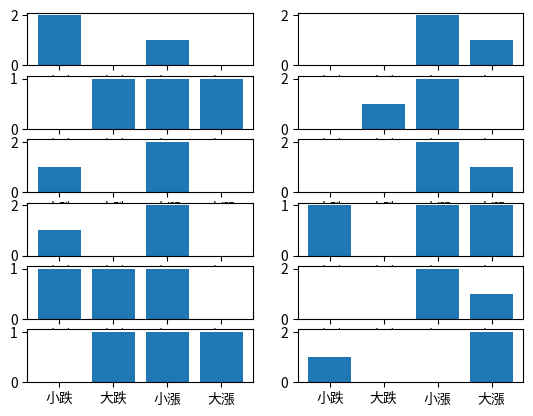

In [99]:
import numpy as np
fig, ax = plt.subplots(nrows=6,ncols=2)
x = np.arange(4)
# ax[0][0].bar(data.loc['生肖']=='鼠',data['漲跌文字'])
row, col = 0, 0
for i,j,k,l in zip( littledown.items(),down.values(),up.values(),bigup.values()):
    temp = []
    if col == 2 :
        col = 0
        row += 1
    temp = [i[1],j,k,l]
    ax[row][col].set_xticks(x , ['小跌','大跌','小漲','大漲'])
    ax[row][col].bar(x,temp)
    col += 1

    
#     plt.labe
    
#     print(temp)
#     print(i,j,k,l)


0


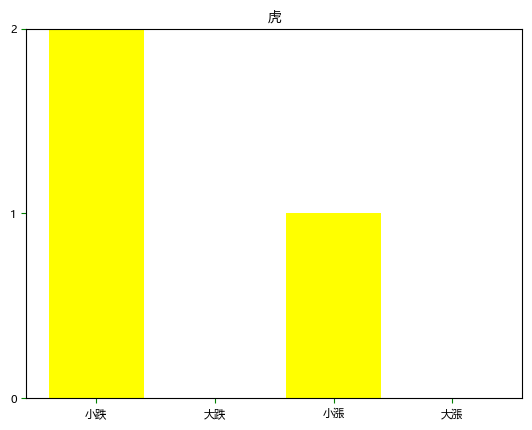

0


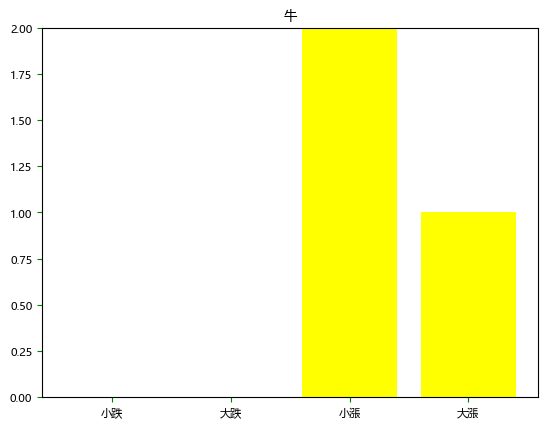

0


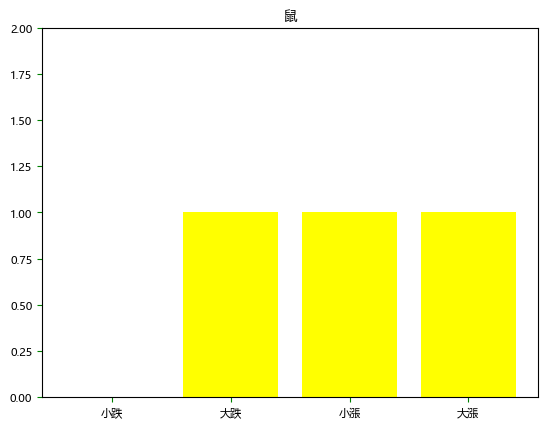

1


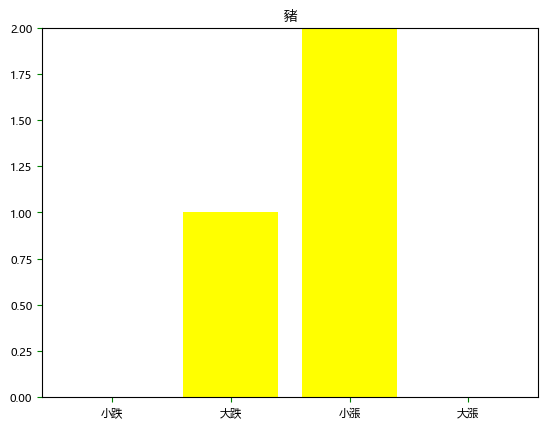

0


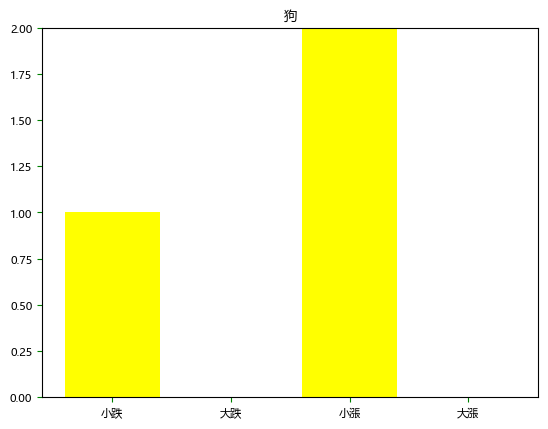

2


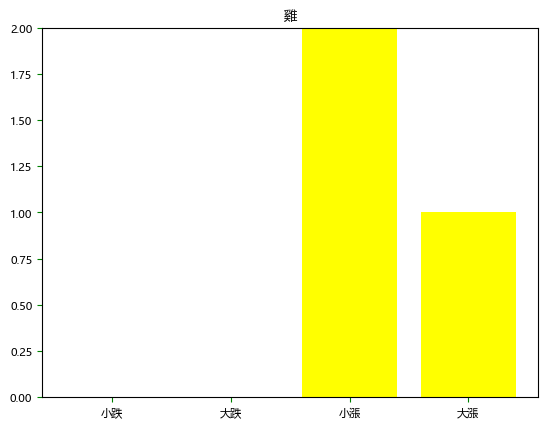

0


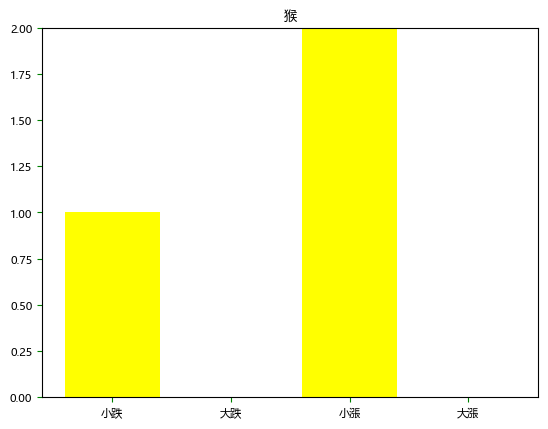

3


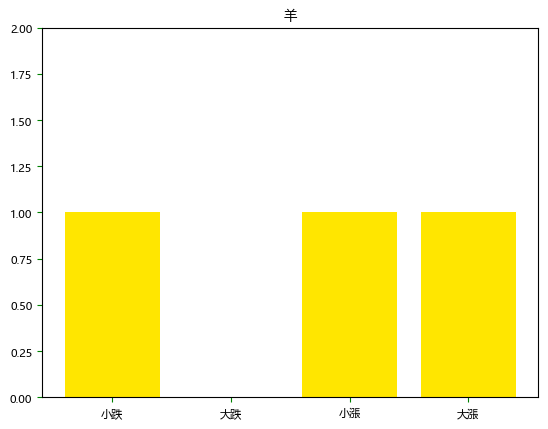

0


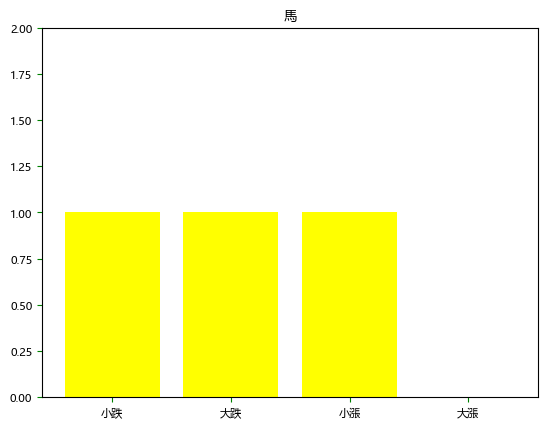

4


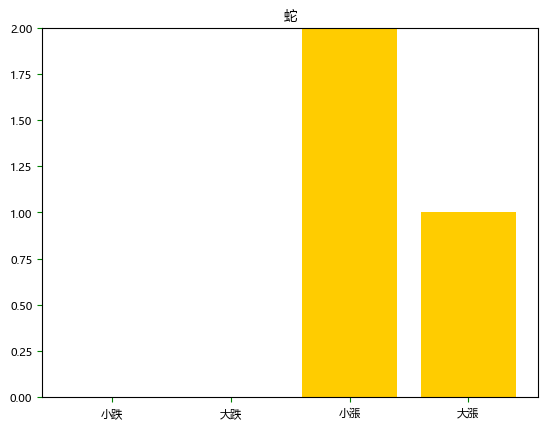

0


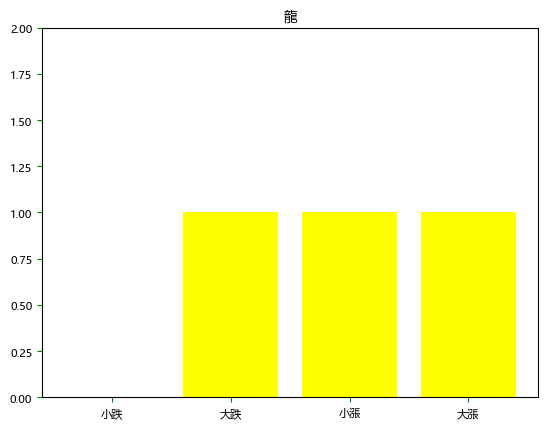

5


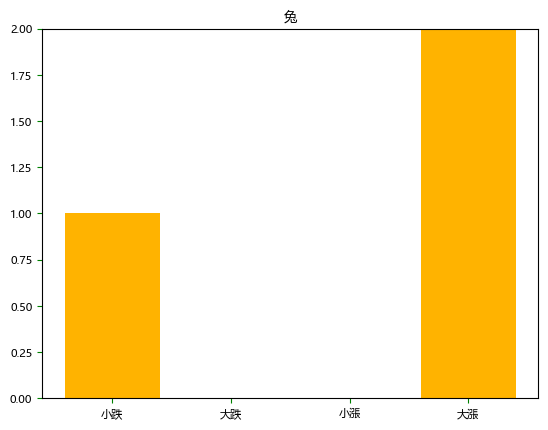

In [143]:
import numpy as np
from matplotlib.pyplot import MultipleLocator
fig, ax = plt.subplots()
x = np.arange(4) # x = [0,1,2,3]
# 設定 y軸 間距 = 1
y_major_locator = MultipleLocator(1)

cmap = plt.colormaps['autumn']
mcolors = cmap([i* 0.1 for i in range(12,0,-1)])

row, col = 0, 0
for i,j,k,l in zip( littledown.items(),down.values(),up.values(),bigup.values()):
    # i = ('虎',1) type = tuple
    temp = []
    if col == 2 :
        col = 0
        row += 1
    temp = [i[1],j,k,l]
    # 修改 y軸 間距
    ax.yaxis.set_major_locator(y_major_locator)
    # 設定 title
    plt.title(i[0])
    # 設定 y軸 距離 0-2
    plt.ylim(0,2)
    print(row*col)
    plt.bar(x, temp, tick_label=['小跌','大跌','小漲','大漲'], color=mcolors[row*col])
    # 每個圖像完成show一次
    plt.show()
    col += 1
    

0


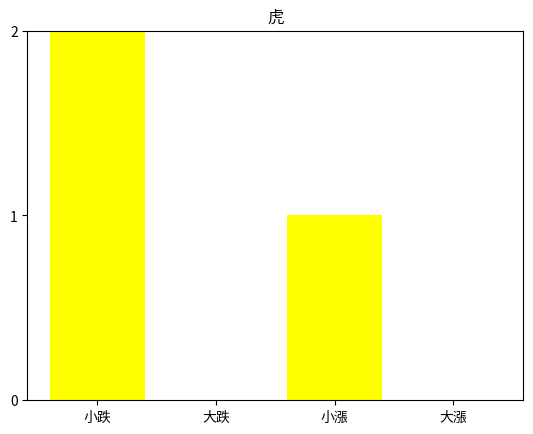

0


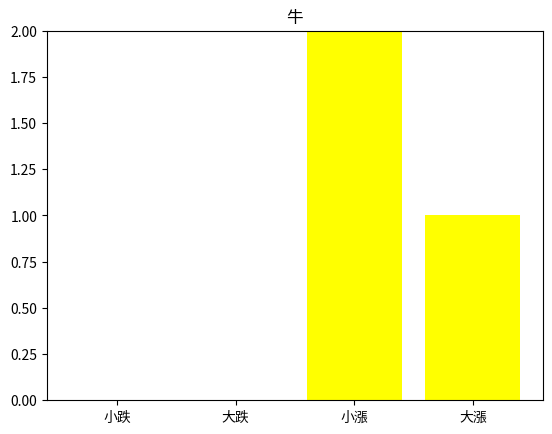

0


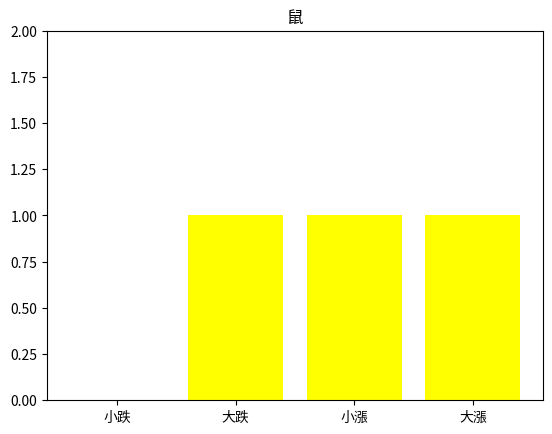

0


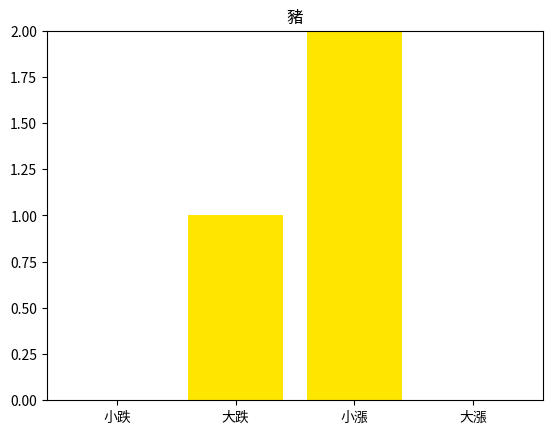

0


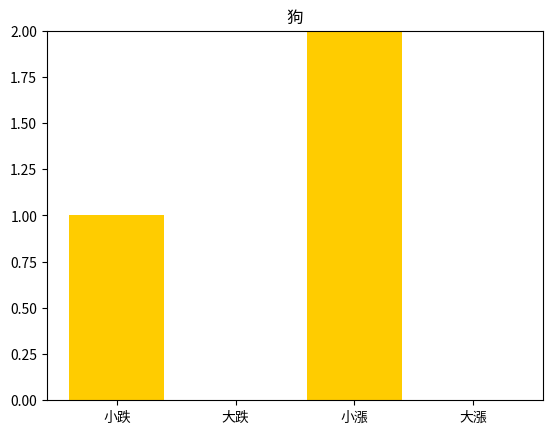

0


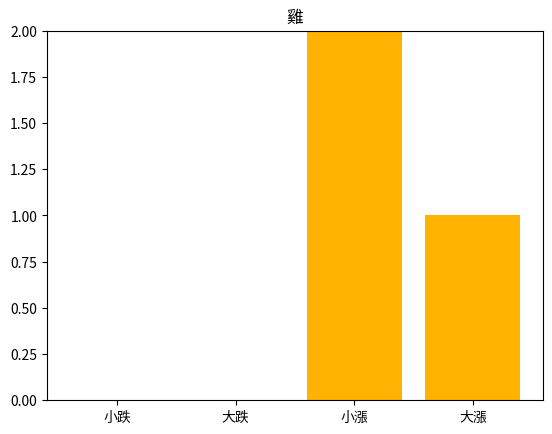

0


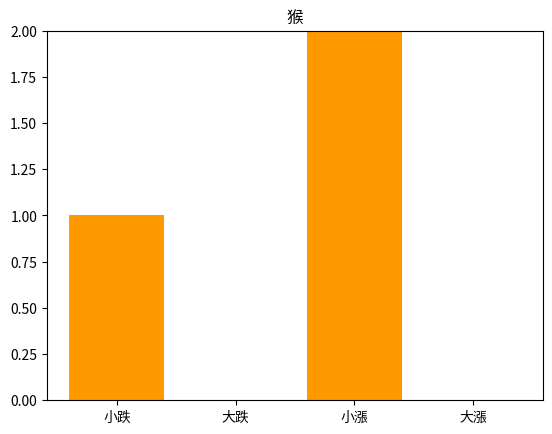

0


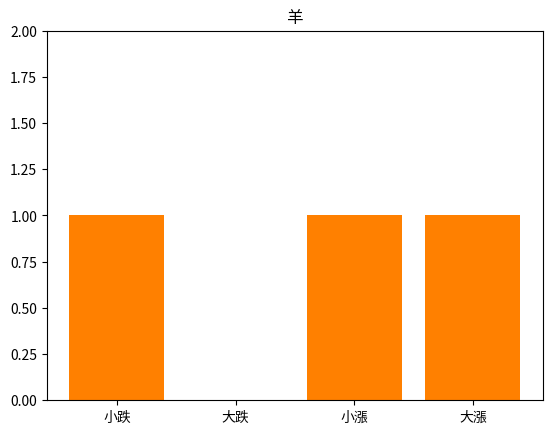

0


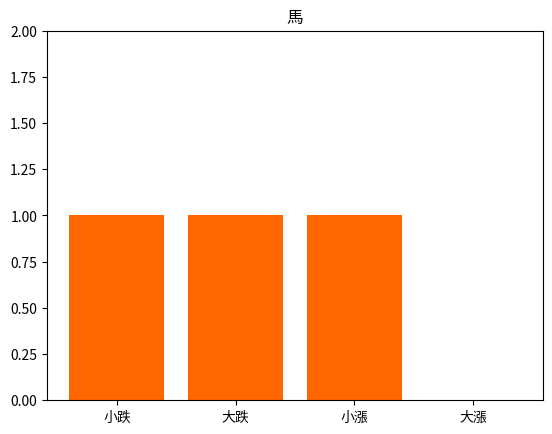

0


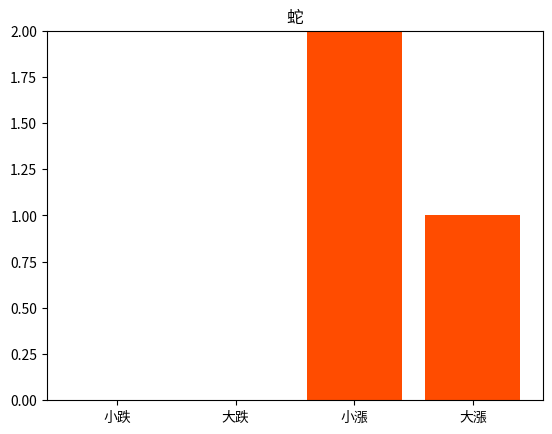

0


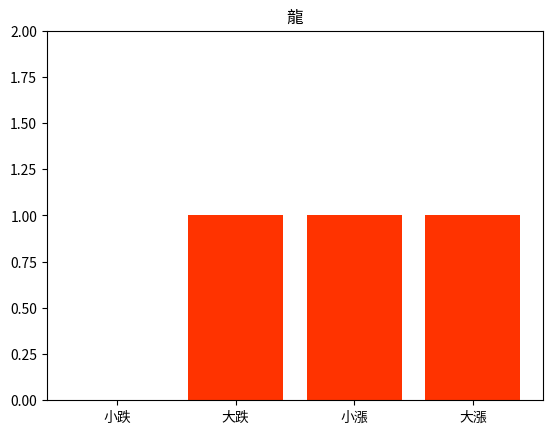

0


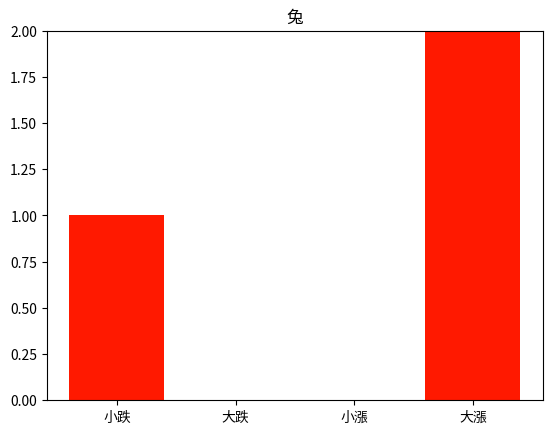

In [123]:
import numpy as np
from matplotlib.pyplot import MultipleLocator
fig, ax = plt.subplots()
x = np.arange(4) # x = [0,1,2,3]
# 設定 y軸 間距 = 1
y_major_locator = MultipleLocator(1)
# set colors
cmap = plt.colormaps['autumn']
mcolors = cmap([i* 0.1 for i in range(12,0,-1)])
num = 0
for i,j,k,l in zip( littledown.items(),down.values(),up.values(),bigup.values()):
    # i = ('虎',1) type = tuple
    temp = []
    temp = [i[1],j,k,l]
    # 修改 y軸 間距
    ax.yaxis.set_major_locator(y_major_locator)
    # 設定 title
    plt.title(i[0])
    # 設定 y軸 距離 0-2
    plt.ylim(0,2)
    print(row*col)
    plt.bar(x, temp, tick_label=['小跌','大跌','小漲','大漲'], color=mcolors[num])
    # 每個圖像完成show一次
    plt.show()
    num+=1
    

<BarContainer object of 4 artists>

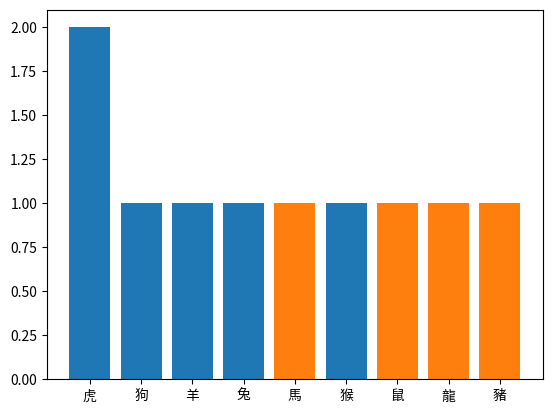

In [4]:
plt.bar(littledown.keys(),littledown.values())
plt.bar(down.keys(),down.values())

Bill Depth (18.35, 18.43, 14.98)
Bill Length (38.79, 48.83, 47.5)
Flipper Length (189.95, 195.82, 217.19)


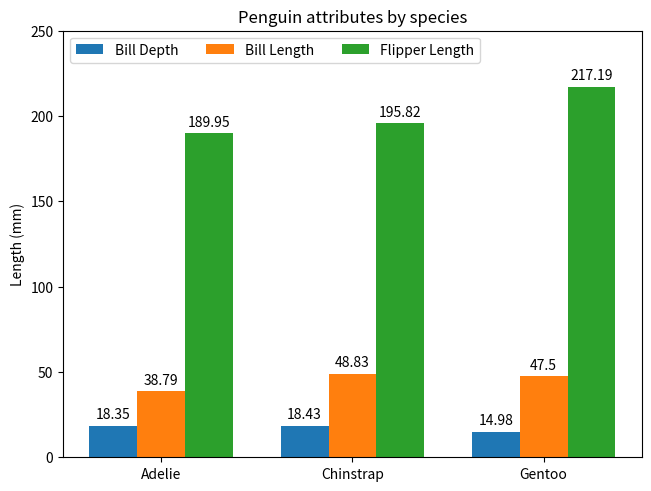

In [21]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    print(attribute,measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

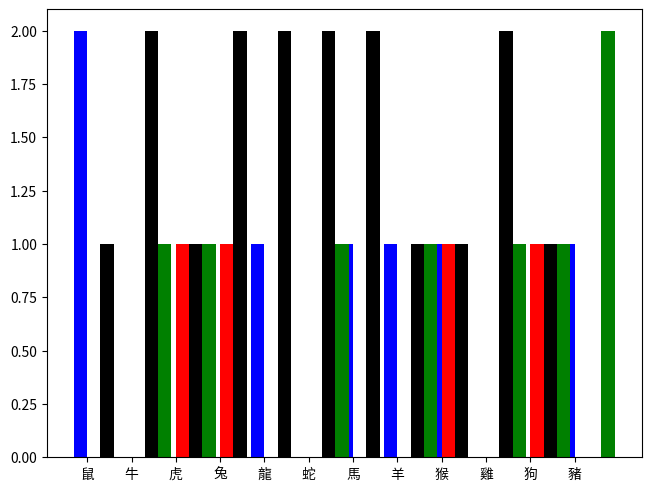

In [33]:
fig, ax = plt.subplots(layout='constrained')
width = 0.3
animal_list = ['鼠','牛','虎','兔','龍','蛇','馬','羊','猴','雞','狗','豬']
x = np.arange(len(animal_list))
# offset = width * multiplier
# print(x+offset)
num = 0
# for i in animal_list:
plt.bar(x , list(littledown.values()), width, color='b')
plt.bar(x + width, list(down.values()), width, color='r')
plt.bar(x + width*2, list(up.values()), width, color='black')
plt.bar(x + width*3,  list(bigup.values()), width, color='g')
plt.xticks(x + width / 2, animal_list)

# plt.bar(x + 1 , littledown['牛'], width, color='g')
# plt.bar(x + width+1, down['牛'], width, color='g')
# plt.bar(x + width*2+1, up['牛'], width, color='g')
# plt.bar(x + width*3+1, bigup['牛'], width, color='g')

# #     ax.bar(offset + x, bigup[val], width, color='g')
# #     ax.bar_label(littledowns, padding=3)
  
# plt.bar(x, math_scores, width, color='green', label='Math')
# plt.bar(x + width, history_scores, width, color='blue', label='History')

# plt.ylabel('Math')
# plt.title('Final Term')
# plt.legend(bbox_to_anchor=(1,1), loc='upper left')
# plt.show()   


plt.show()

In [45]:
data[(data['生肖']=='鼠') & (data['漲跌文字']=='大跌')]

,交易 年度,開盤,最高,最低,收盤,漲跌,漲跌 (%),振幅 (%),生肖,year,漲跌文字,生肖漲機率%,生肖跌機率%,小跌,大跌,小漲,大漲
15,2008,8491.57,9309.95,3955.43,4591.22,-3915.06,-46.0,62.9,鼠,第二年,大跌,67,33,0,1,0,0


<BarContainer object of 36 artists>

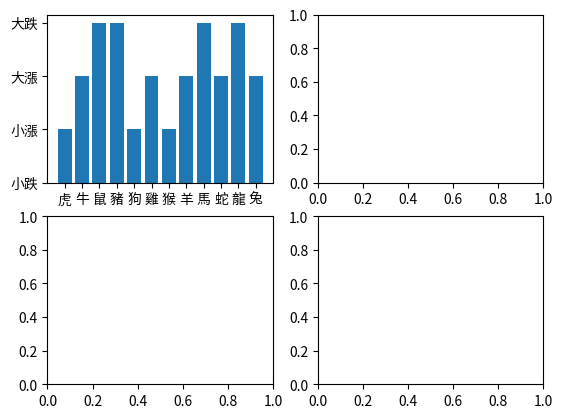

In [85]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0][0].bar(data['生肖'],data['漲跌文字'])

In [169]:
type(littledown.keys())

dict_keys

In [170]:
littledown.keys()

dict_keys(['虎', '狗', '羊', '兔', '馬', '猴'])

In [171]:
str(littledown.keys())

"dict_keys(['虎', '狗', '羊', '兔', '馬', '猴'])"

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

<BarContainer object of 36 artists>

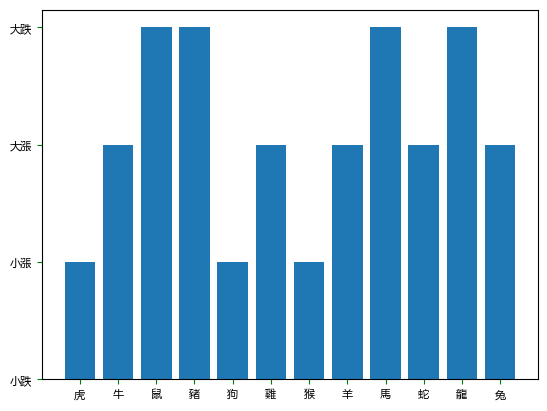

In [135]:
plt.bar(data['生肖'],data['漲跌文字'])

In [4]:
# 跌的平均
data.loc[data['漲跌 (%)'] < 0,'漲跌 (%)'].mean()

-27.345454545454547

In [5]:
# 漲的平均
data.loc[data['漲跌 (%)'] > 0,'漲跌 (%)'].mean()

32.416

In [32]:
12//12

1

In [61]:
data.columns

Index(['交易 年度', '開盤', '最高', '最低', '收盤', '漲跌', '漲跌 (%)', '振幅 (%)'], dtype='object')

In [4]:
data.columns[0][1] 

'交易 年度'

In [59]:
data.columns = data.columns.droplevel(1)# remove MultiIndex 

In [6]:
data.columns

Index(['交易 年度', '交易 日數', '開盤', '最高', '最低', '收盤', '漲跌', '漲跌 (%)', '振幅 (%)',
       '總成交 (億元)', '日成交 均量', '法人買賣超 (億元)', '法人買賣超 (億元)', '法人買賣超 (億元)',
       '法人買賣超 (億元)', '融資 (億元)', '融資 (億元)', '融券 (萬張)', '融券 (萬張)'],
      dtype='object')

In [31]:
data.columns

Index(['交易 年度', '開盤', '最高', '最低', '收盤', '漲跌', '漲跌 (%)', '振幅 (%)'], dtype='object')

In [14]:
data.index

RangeIndex(start=0, stop=37, step=1)

In [26]:
animal = {4: '鼠', 5: '牛', 6: '虎', 7: '兔', 8: '龍', 9: '蛇', 10: '馬', 11: '羊', 
          0: '猴', 1: '雞', 2: '狗', 3: '豬'}
animal[4]

'鼠'

In [99]:
animal_list = ['鼠','牛','虎','兔','龍','蛇','馬','羊','猴','雞','狗','豬']
for i in animal_list :   
    print(data.loc[data['生肖'] == i ,'漲跌 (%)'].mean())

3.6
40.03333333333333
-11.473333333333334
43.46666666666667
27.99
38.96666666666667
-21.540000000000003
7.819999999999999
-3.7900000000000005
33.82
9.433333333333332
1.5400000000000016


## 甚麼時候開始計算?計算到甚麼時候?

In [15]:
# 1987 - 2022

## 歷年兔年漲多少?

In [130]:
data[data['生肖']=='兔'][['交易 年度','生肖','漲跌 (%)']]

,交易 年度,生肖,漲跌 (%)
12,2011,兔,-21.2
24,1999,兔,31.6
36,1987,兔,120.0


## 兔年平均漲多少?

In [133]:
# 四捨五入
round(data.loc[data['生肖']=='兔','漲跌 (%)'].mean())

43

## 各生肖平均漲跌幅

In [136]:
df = data.pivot_table(values='漲跌 (%)', index=['生肖'])
# 排序大到小
df1 = df.reindex(df['漲跌 (%)'].sort_values(ascending=False).index)
df1

,漲跌 (%)
生肖,
兔,43.466667
牛,40.033333
蛇,38.966667
雞,33.820000
龍,27.990000
狗,9.433333
羊,7.820000
鼠,3.600000
豬,1.540000


In [137]:
df = data.pivot_table(values='漲跌 (%)', index=['生肖','大漲','小漲'])
# 排序大到小
df1 = df.reindex(df['漲跌 (%)'].sort_values(ascending=False).index)
df1

,,,漲跌 (%)
生肖,大漲,小漲,
龍,1,0,119.000
蛇,1,0,88.000
雞,1,0,79.800
牛,1,0,78.300
兔,1,0,75.800
鼠,1,0,34.000
羊,1,0,32.300
鼠,0,1,22.800
牛,0,1,20.900


In [132]:
data.pivot_table(values='漲跌 (%)', index=['生肖','year','交易 年度'])

漲跌 (%)
生肖 year 交易 年度        
兔  第一年  1987   120.00
   第三年  2011   -21.20
   第二年  1999    31.60
牛  第一年  1997    18.10
   第三年  2021    23.70
   第二年  2009    78.30
狗  第一年  1994    17.40
   第三年  2018    -8.60
   第二年  2006    19.50
猴  第一年  1992   -26.60
   第三年  2016    11.00
   第二年  2004     4.23
羊  第一年  1991     1.56
   第三年  2015   -10.40
   第二年  2003    32.30
虎  第一年  1998   -21.60
   第三年  2022   -22.40
   第二年  2010     9.58
蛇  第一年  1989    88.00
   第三年  2013    11.80
   第二年  2001    17.10
豬  第一年  1995   -27.40
   第三年  2019    23.30
   第二年  2007     8.72
雞  第一年  1993    79.80
   第三年  2017    15.00
   第二年  2005     6.66
馬  第一年  1990   -52.90
   第三年  2014     8.08
   第二年  2002   -19.80
鼠  第一年  1996    34.00
   第三年  2020    22.80
   第二年  2008   -46.00
龍  第一年  1988   119.00
   第三年  2012     8.87
   第二年  2000   -43.90

## 兔年漲的機率多少?

In [114]:
round(data[(data['生肖']=='兔') & (data['漲跌 (%)'] > 0)].shape[0] / 3 * 100)

67

## 各個生肖漲的機率?

In [85]:
data.pivot_table(values='生肖漲機率%', index='生肖')

,生肖漲機率%
生肖,
兔,67
牛,100
狗,67
猴,67
羊,67
虎,33
蛇,100
豬,67
雞,100


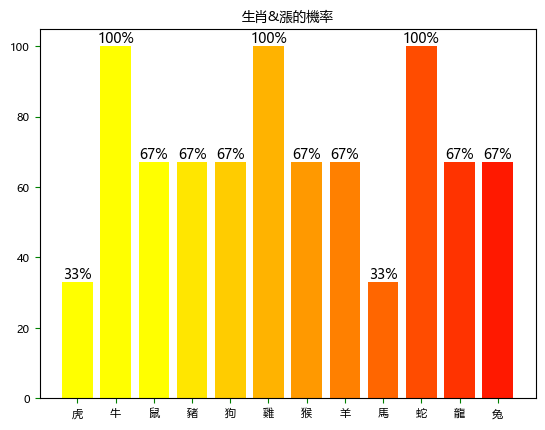

In [141]:
import numpy as np
import matplotlib as mpl
# 恢復預設引數
# mpl.rcdefaults()
animal_list = ['鼠','牛','虎','兔','龍','蛇','馬','羊','猴','雞','狗','豬']
# default setting
mpl.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.size'] = 8
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['xtick.color'] = 'g'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.color'] = 'g'
mpl.rcParams['ytick.labelcolor'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'b'
# set title 
plt.title('生肖&漲的機率', color='black')
# set colors
cmap = plt.colormaps['autumn']
mcolors = cmap([i* 0.1 for i in range(12,0,-1)])
# set text ex:設置漲跌機率在生肖上
for i in range(1,13):
    text = data.loc[i,'生肖漲機率%']
    plt.text(i-1, data.loc[i,'生肖漲機率%'] + 1, f'{text}%', fontsize=10, ha='center')
# draw    
plt.bar(data['生肖'], data['生肖漲機率%'],color=mcolors ,width=0.8, align='center')
plt.show()

## 各生肖年誰跌最多?跌多少?跌的機率?(堆疊長條圖)

## 哪個生肖最容易谷底反彈(震幅大 且最後為正)

## 使用mysql?

## 漲幅平均

In [76]:
data['漲跌 (%)'].mean()

14.155555555555557

In [78]:
data['漲跌 (%)'].quantile([0.25,0.5,0.75])

0.25   -12.75
0.50    10.29
0.75    23.40
Name: 漲跌 (%), dtype: float64

In [86]:
# 用平均來判斷大漲小漲、大跌小跌? or 

In [88]:
data[,'漲跌 (%)'].mean()

14.155555555555557

In [131]:
data.loc[data['生肖'] =='牛','漲跌文字'].value_counts()

小漲    2
大漲    1
Name: 漲跌文字, dtype: int64

## 各生肖年誰大漲最多?

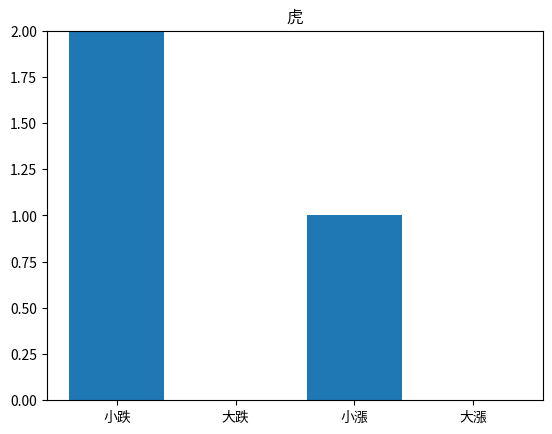

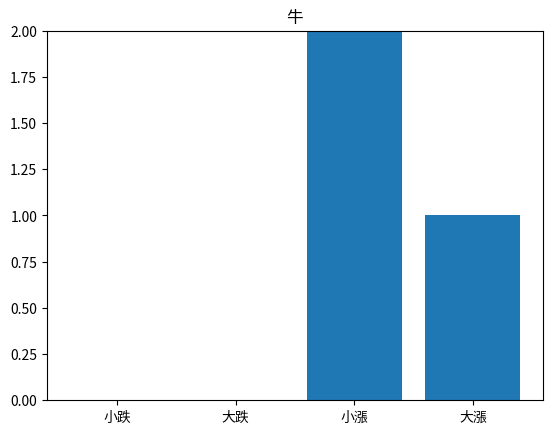

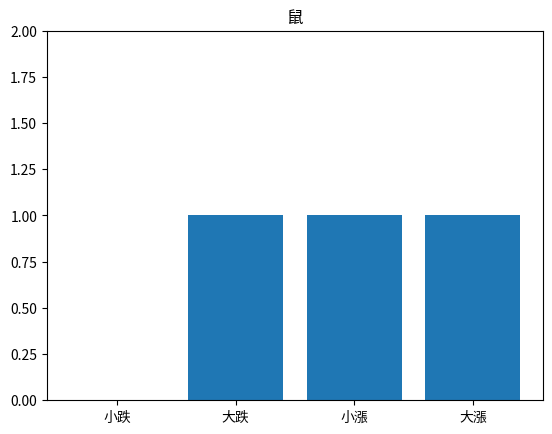

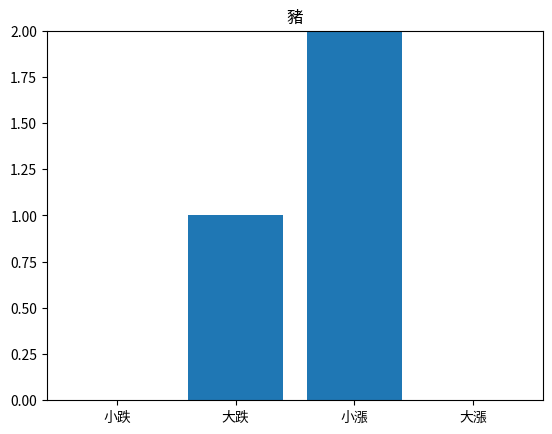

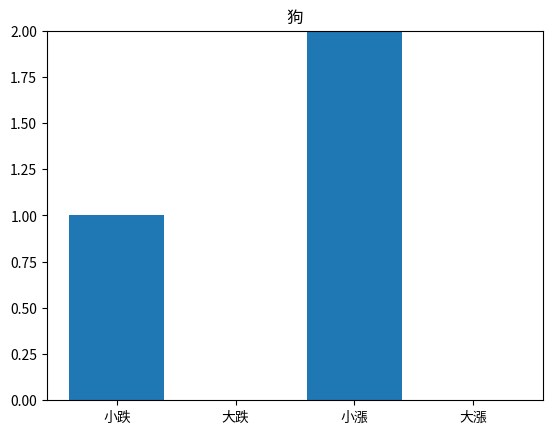

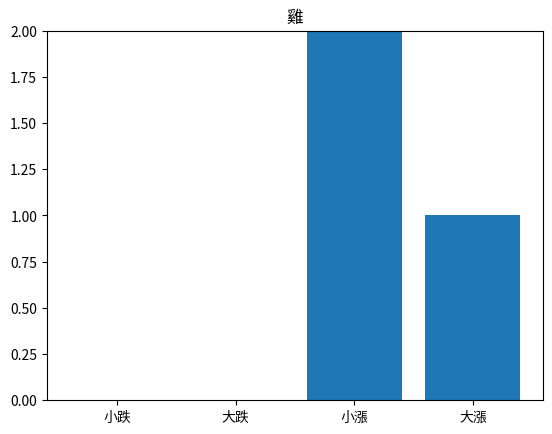

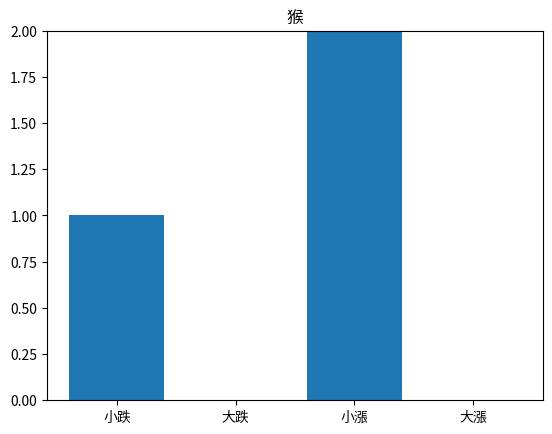

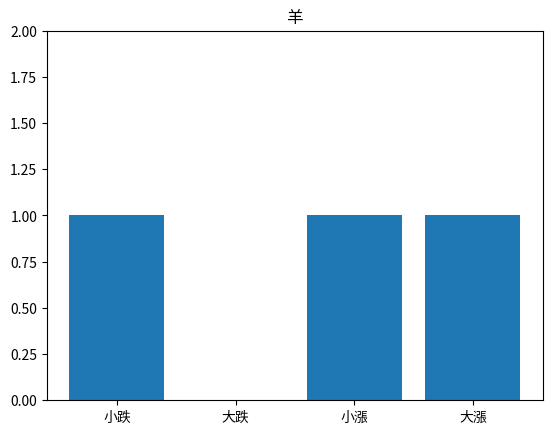

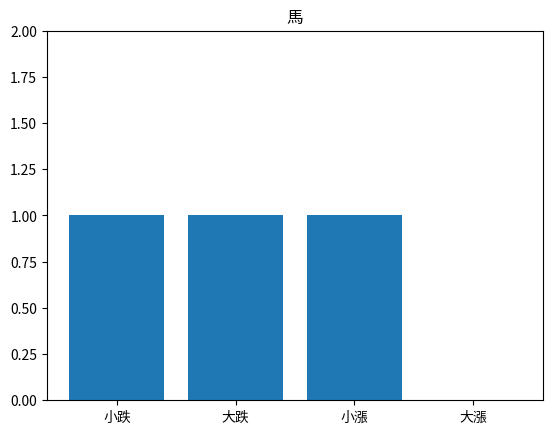

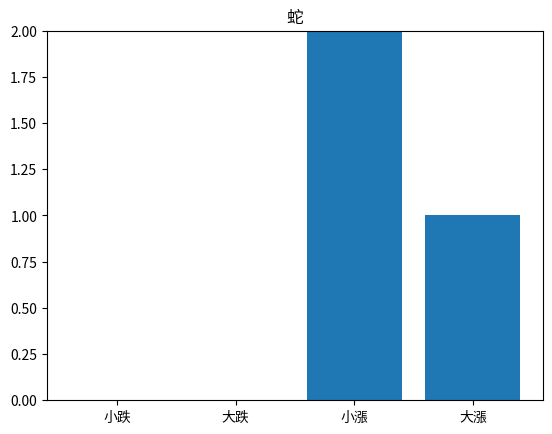

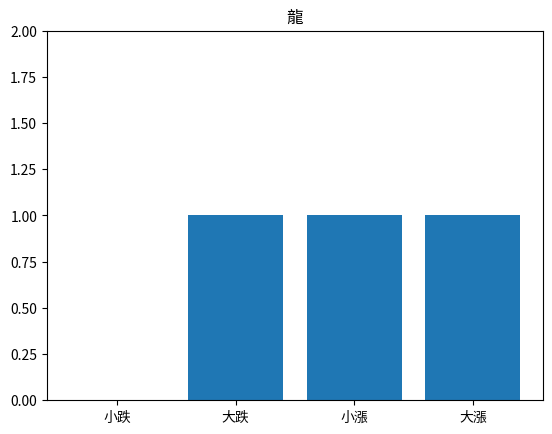

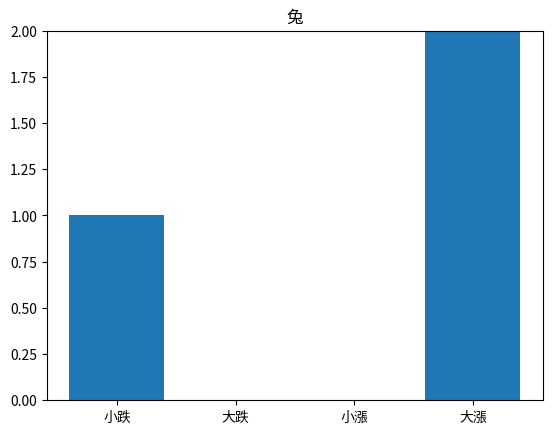

In [110]:
import numpy as np
# fig, ax = plt.subplots()
x = np.arange(4)



row, col = 0, 0
for i,j,k,l in zip( littledown.items(),down.values(),up.values(),bigup.values()):
    temp = []
    if col == 2 :
        col = 0
        row += 1
    temp = [i[1],j,k,l]
    ax.t.title(i[0])
    plt.ylim(0,2)
    plt.bar(x,temp,tick_label=['小跌','大跌','小漲','大漲'])
    plt.show()
    col += 1

In [126]:
dict_bigup = {}
for i in range(1,data.shape[0]):
    if data.loc[i,'漲跌文字'] == '大漲':
        dict_bigup[data.loc[i,'生肖']] = dict_bigup.get(data.loc[i,'生肖'],0) + 1
dict_bigup      

{'牛': 1, '羊': 1, '兔': 2, '鼠': 1, '雞': 1, '蛇': 1, '龍': 1}

In [108]:
data.pivot_table(values='漲跌文字',index='生肖',aggfunc= pd.Series.nunique)

,漲跌文字
生肖,
兔,2
牛,2
狗,2
猴,2
羊,3
虎,2
蛇,2
豬,2
雞,2


In [137]:
# 總共大跌、小跌、大漲、小漲次數
animal_list = ['鼠','牛','虎','兔','龍','蛇','馬','羊','猴','雞','狗','豬']
for i in animal_list :
    print(i)
    temp = []
    temp = [data.loc[data['生肖'] == i,'漲跌文字'].value_counts()[0]]
    print(temp)
    print(data.loc[data['生肖'] == i,'漲跌文字'].value_counts())
    print(data.loc[data['生肖'] == i,'漲跌 (%)'].mean())
    print('===============================')

鼠
[1]
小漲    1
大跌    1
大漲    1
Name: 漲跌文字, dtype: int64
3.6
牛
[2]
小漲    2
大漲    1
Name: 漲跌文字, dtype: int64
40.03333333333333
虎
[2]
小跌    2
小漲    1
Name: 漲跌文字, dtype: int64
-11.473333333333334
兔
[2]
大漲    2
小跌    1
Name: 漲跌文字, dtype: int64
43.46666666666667
龍
[1]
小漲    1
大跌    1
大漲    1
Name: 漲跌文字, dtype: int64
27.99
蛇
[2]
小漲    2
大漲    1
Name: 漲跌文字, dtype: int64
38.96666666666667
馬
[1]
小漲    1
小跌    1
大跌    1
Name: 漲跌文字, dtype: int64
-21.540000000000003
羊
[1]
小跌    1
大漲    1
小漲    1
Name: 漲跌文字, dtype: int64
7.819999999999999
猴
[2]
小漲    2
小跌    1
Name: 漲跌文字, dtype: int64
-3.7900000000000005
雞
[2]
小漲    2
大漲    1
Name: 漲跌文字, dtype: int64
33.82
狗
[2]
小漲    2
小跌    1
Name: 漲跌文字, dtype: int64
9.433333333333332
豬
[2]
小漲    2
大跌    1
Name: 漲跌文字, dtype: int64
1.5400000000000016


## 各生肖年誰大漲最多?漲多少?漲的機率?

In [27]:
# 各生肖漲跌平均
data.pivot_table(values='漲跌 (%)', index=['生肖','year'])
data.sort_values(by='year').pivot_table(values='漲跌 (%)', index=['生肖','year'])

漲跌 (%)
生肖 year        
兔  第一年   120.00
   第三年   -21.20
   第二年    31.60
牛  第一年    18.10
   第三年    23.70
   第二年    78.30
狗  第一年    17.40
   第三年    -8.60
   第二年    19.50
猴  第一年   -26.60
   第三年    11.00
   第二年     4.23
羊  第一年     1.56
   第三年   -10.40
   第二年    32.30
虎  第一年   -21.60
   第三年   -22.40
   第二年     9.58
蛇  第一年    88.00
   第三年    11.80
   第二年    17.10
豬  第一年   -27.40
   第三年    23.30
   第二年     8.72
雞  第一年    79.80
   第三年    15.00
   第二年     6.66
馬  第一年   -52.90
   第三年     8.08
   第二年   -19.80
鼠  第一年    34.00
   第三年    22.80
   第二年   -46.00
龍  第一年   119.00
   第三年     8.87
   第二年   -43.90

<BarContainer object of 36 artists>

C:\Program Files\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 34382 (\N{CJK UNIFIED IDEOGRAPH-864E}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29275 (\N{CJK UNIFIED IDEOGRAPH-725B}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 40736 (\N{CJK UNIFIED IDEOGRAPH-9F20}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35948 (\N{CJK UNIFIED IDEOGRAPH-8C6C}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29399 (\N{CJK UNIFIED IDEOGRAPH-72D7}) missing from current font.
  func(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38622 (\N{

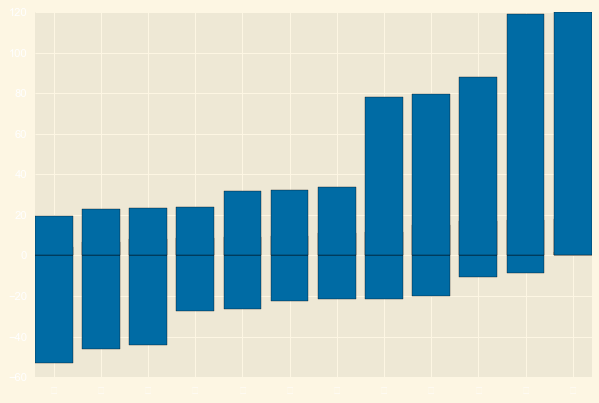

In [15]:
import matplotlib.pyplot as plt

colors = ['r','b','g','y','m']

plt.bar(data['生肖'], sorted(data['漲跌 (%)']))
# 會畫一個範圍
# 畫平均

<BarContainer object of 36 artists>

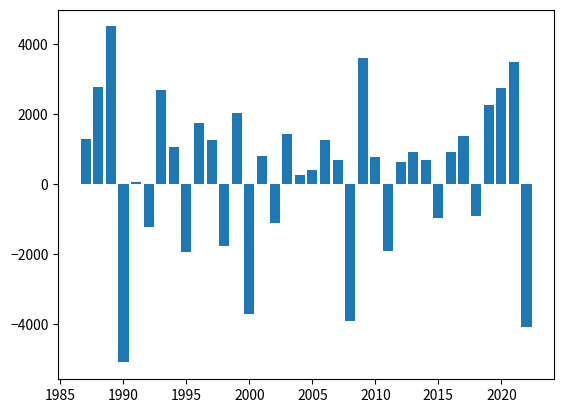

In [25]:
plt.bar(data['交易 年度'], data['漲跌'])

<BarContainer object of 36 artists>

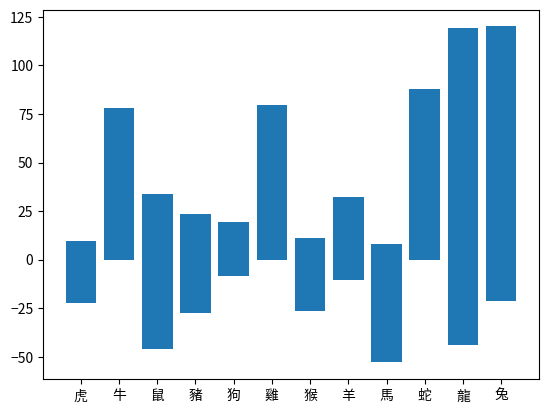

In [12]:
plt.bar(data['生肖'], data['漲跌 (%)'])